#Uploading top500 dataset
This dataset contains the top 500 songs with the highest views from 2005 to 2023 for each year.

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Path to the CSV file on your Google Drive
file_path = '/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/top500.csv'

# Load the dataset using pandas
dataset = pd.read_csv(file_path)
dataset


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,title,tag,artist,year,views,features,lyrics,id,language_cld3,language_ft,language
0,Gold Digger,rap,Kanye West,2005,2044039,"{""Jamie Foxx""}",[Produced by Kanye West and Jon Brion]\n\n[Int...,1267,en,en,en
1,Feel Good Inc.,rap,Gorillaz,2005,2017092,"{""De La Soul""}",[Intro: Maseo & 2-D]\nHahahahahahahahahahahaha...,21569,en,en,en
2,Little Einsteins Theme Song,pop,Billy Straus,2005,1684132,{},"[Intro]\n5, 4, 3, 2, 1!\n\n[Chorus]\nWe're goi...",712367,en,en,en
3,When Im Gone,rap,Eminem,2005,1494728,{},"[Intro]\nYeah, it's my life\nIn my own words, ...",1239,en,en,en
4,SpongeBob SquarePants Theme Song,pop,SpongeBob SquarePants,2005,1289363,{},"[Intro: Painty the Pirate]\nAre you ready, kid...",93364,en,en,en
...,...,...,...,...,...,...,...,...,...,...,...
9386,Beautiful forever,rap,CK The Rapper,2023,1,{},"VERSE 1\nYou're so beautiful, don't let anyone...",7824698,en,en,en
9387,History,rap,CK The Rapper,2023,1,{},"INTRO\nWE FIGHT, WE WIN. USE YOUR VOICE don't ...",7824700,en,en,en
9388,We are going to mac donalds,pop,Mr. Hudson,2023,1,{HDKoality},We all going to mac donalds with each other on...,7844350,en,en,en
9389,NOT A BAD THING PAIR OF WINGS DOUBLE COVER,pop,'Hyun Changmin',2023,0,"{""현창민\\'Hyun Changmin\\'""}","[Intro]\nThis is for you, bae\nThe love of my ...",7720570,en,en,en


#Uploading the model
The model we uploaded is the one created in the 'MODEL' notebook

In [2]:
percorso_del_modello = '/content/drive/MyDrive/Appunti/TXA/TXA - the Sloop 🏴‍☠️/FINAL/Copia di model_TXA.keras'
import tensorflow as tf

# Uploading model
modello = tf.keras.models.load_model(percorso_del_modello)

#Text cleaning
Applying text cleaning and removing stopwords before text vectorization.



In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer

# Download stopwords and tokenizers if not already present
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Function to preprocess text
def preprocess_text(text):
    # Remove comments between square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove linebreak characters
    text = re.sub(r'\n', ' ', text)

    # Tokenize words
    tokens = word_tokenize(text.lower())

    # Remove punctuation and stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.isalnum()]

    # Rejoin tokens into clean text
    clean_text = ' '.join(tokens)
    return clean_text


# Apply the preprocess_text function to the 'lyrics' column of the DataFrame df
dataset['clean_lyrics'] = dataset['lyrics'].apply(preprocess_text)

# Display the updated DataFrame
print(dataset[['lyrics', 'clean_lyrics']])
dataset = dataset.drop('lyrics', axis=1)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                                 lyrics  \
0     [Produced by Kanye West and Jon Brion]\n\n[Int...   
1     [Intro: Maseo & 2-D]\nHahahahahahahahahahahaha...   
2     [Intro]\n5, 4, 3, 2, 1!\n\n[Chorus]\nWe're goi...   
3     [Intro]\nYeah, it's my life\nIn my own words, ...   
4     [Intro: Painty the Pirate]\nAre you ready, kid...   
...                                                 ...   
9386  VERSE 1\nYou're so beautiful, don't let anyone...   
9387  INTRO\nWE FIGHT, WE WIN. USE YOUR VOICE don't ...   
9388  We all going to mac donalds with each other on...   
9389  [Intro]\nThis is for you, bae\nThe love of my ...   
9390  Cosmic disease spread through parasitic genes ...   

                                           clean_lyrics  
0     she take my money when i in need yeah she a tr...  
1     hahahahahahahahahahahahahahahaha feel good sha...  
2     5 4 3 2 1 we going on a trip in our favorite r...  
3     yeah it my life in my own words i guess have y...  
4

#Application of the model
We vectorize the new dataset's lyrics as embeddings and apply our model.

In [4]:
# Maximum number of features to consider
max_features = 10000

# Create the Tokenizer
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(dataset['clean_lyrics'])

# Convert preprocessed text into sequences of integers
sequences = tokenizer.texts_to_sequences(dataset['clean_lyrics'])

# Maximum length of sequences
maxlen = 200

# Padding of sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Convert preprocessed text into sequences of integers with padding
sequences = tokenizer.texts_to_sequences(dataset['clean_lyrics'])
padded_sequences = pad_sequences(sequences, maxlen=maxlen)

# Make predictions on the new instances
predictions = modello.predict(padded_sequences)

# Add a new column 'prediction' to the DataFrame with the predictions
dataset['prediction'] = predictions

# Display the DataFrame with the updated columns
print(dataset[['clean_lyrics', 'prediction']])

294/294 [==============================] - 11s 37ms/step
                                           clean_lyrics  prediction
0     she take my money when i in need yeah she a tr...    0.065277
1     hahahahahahahahahahahahahahahaha feel good sha...    0.002088
2     5 4 3 2 1 we going on a trip in our favorite r...    0.344913
3     yeah it my life in my own words i guess have y...    0.152854
4     are you ready kids aye aye captain i ca hear y...    0.081670
...                                                 ...         ...
9386  verse 1 you so beautiful do let anyone tell yo...    0.186353
9387  intro we fight we win use your voice do let ot...    0.025803
9388  we all going to mac donalds with each other on...    0.012591
9389  this is for you bae the love of my life but yo...    0.228278
9390  cosmic disease spread through parasitic genes ...    0.038572

[9391 rows x 2 columns]


# Sentiment_pred new column
The new column 'sentiment_pred' will return 1 if the value of 'prediction' is greater than 0.3, and 0 otherwise.

In [10]:
dataset['sentiment_pred'] = dataset['prediction'].apply(lambda x: 0 if x < 0.3 else 1)

print(dataset[['prediction', 'sentiment_pred']])

      prediction  sentiment_pred
0       0.065277               0
1       0.002088               0
2       0.344913               1
3       0.152854               0
4       0.081670               0
...          ...             ...
9386    0.186353               0
9387    0.025803               0
9388    0.012591               0
9389    0.228278               0
9390    0.038572               0

[9391 rows x 2 columns]


# Visualizing results

In this section, we will examine and visualize the graphs that we consider most appropriate.

#500 most popular songs
* Year composition in terms of passive-negative songs
* Average classifier score by year

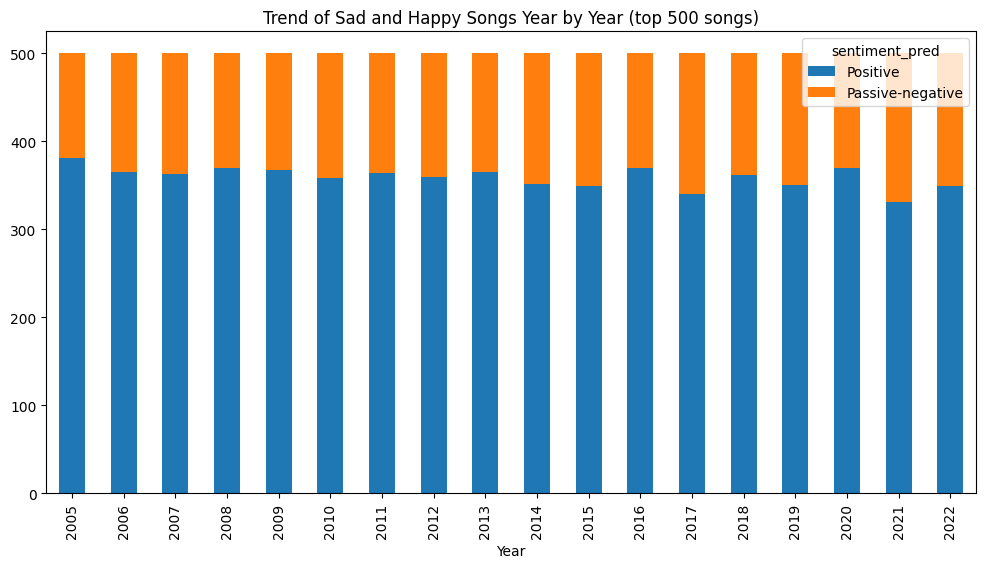

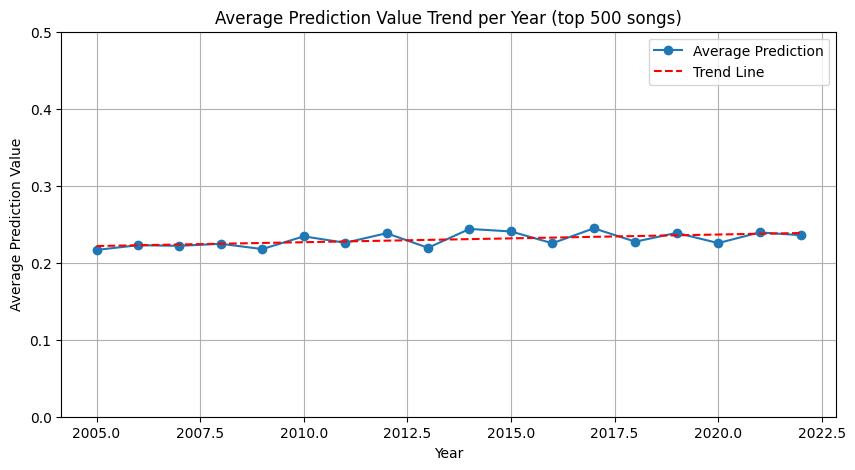

In [42]:
import matplotlib.pyplot as plt

# Filter the DataFrame for years between 2005 and 2024
filtered_dataset = dataset[(dataset['year'] >= 2005) & (dataset['year'] <= 2022)]

# Group by year and check the distribution of sentiment_pred
sentiment_trend = filtered_dataset.groupby(['year', 'sentiment_pred']).size().unstack(fill_value=0)

# Create a stacked bar chart
sentiment_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trend of Sad and Happy Songs Year by Year (top 500 songs)')
plt.xlabel('Year')
plt.legend(title='sentiment_pred', labels=['Positive', 'Passive-negative'])
plt.show()

# Calculate the average 'prediction' value for each 'year'
average_prediction_per_year = filtered_dataset.groupby('year')['prediction'].mean()

# Get the x and y values for the trend line
x = average_prediction_per_year.index.values
y = average_prediction_per_year.values
z = np.polyfit(x, y, 1)  # Fit a linear regression
p = np.poly1d(z)  # Create a polynomial from the coefficients

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Average Prediction', marker='o')
plt.plot(x, p(x), "r--", label='Trend Line')  # Red dashed trend line
plt.title('Average Prediction Value Trend per Year (top 500 songs)')
plt.xlabel('Year')
plt.ylabel('Average Prediction Value')
plt.grid(True)
plt.ylim(0, 0.5)  # Set the limits of the y-axis as per your request
plt.legend()
plt.show()


#100 most popular songs
* Year composition in terms of passive-negative songs
* Average classifier score by year

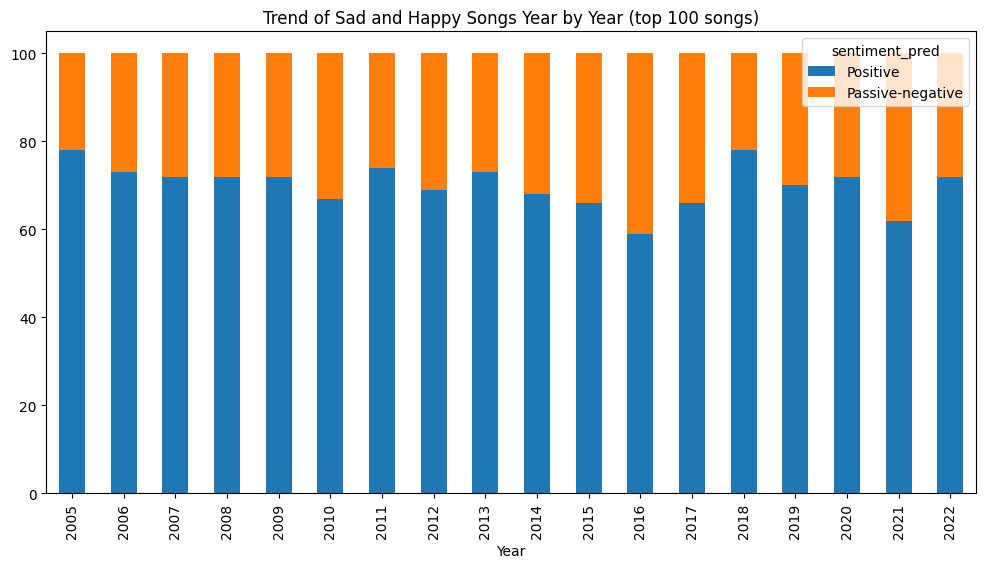

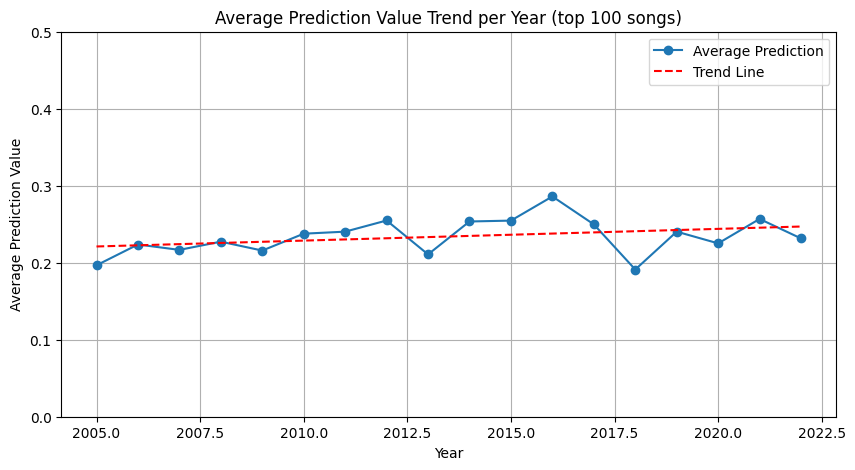

In [43]:
import matplotlib.pyplot as plt

# Sort the DataFrame first by 'year' and then by 'views' in descending order
df_sorted = filtered_dataset.sort_values(by=['year', 'views'], ascending=[True, False])

# Group by 'year' and take the first 100 rows for each year
df_top100_per_year = df_sorted.groupby('year').head(100)

# Group by year and check the distribution of sentiment_pred
sentiment_trend = df_top100_per_year.groupby(['year', 'sentiment_pred']).size().unstack(fill_value=0)

# Create a stacked bar chart
sentiment_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trend of Sad and Happy Songs Year by Year (top 100 songs)')
plt.xlabel('Year')
plt.legend(title='sentiment_pred', labels=['Positive', 'Passive-negative'])
plt.show()

# Calculate the average 'prediction' value for each 'year'
average_prediction_per_year = df_top100_per_year.groupby('year')['prediction'].mean()

# Get the x and y values for the trend line
x = average_prediction_per_year.index.values
y = average_prediction_per_year.values
z = np.polyfit(x, y, 1)  # Fit a linear regression
p = np.poly1d(z)  # Create a polynomial from the coefficients

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Average Prediction', marker='o')
plt.plot(x, p(x), "r--", label='Trend Line')  # Red dashed trend line
plt.title('Average Prediction Value Trend per Year (top 100 songs)')
plt.xlabel('Year')
plt.ylabel('Average Prediction Value')
plt.grid(True)
plt.ylim(0, 0.5)  # Set the limits of the y-axis as per your request
plt.legend()
plt.show()



#20 most popular songs
* Year composition in terms of passive-negative songs
* Average classifier score by year

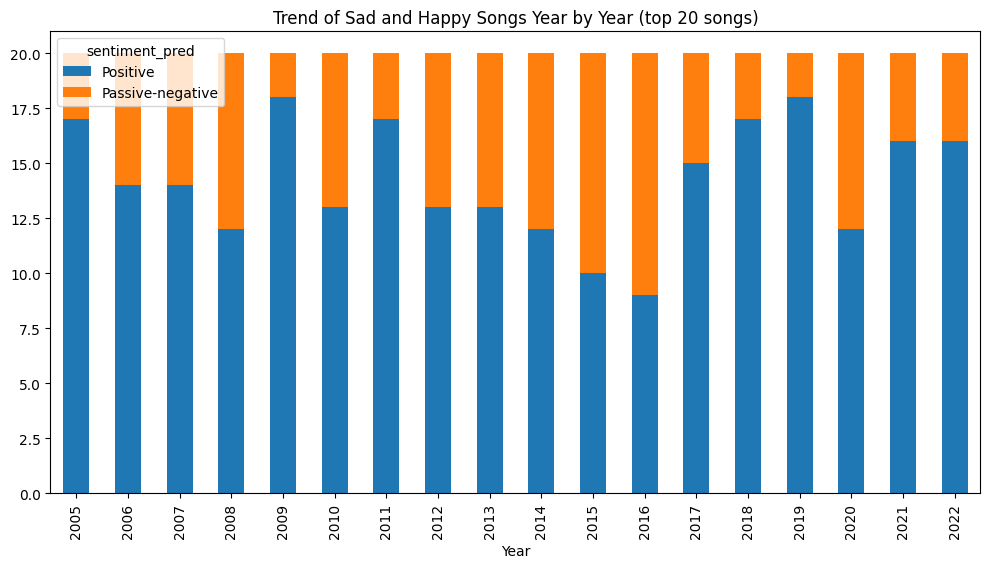

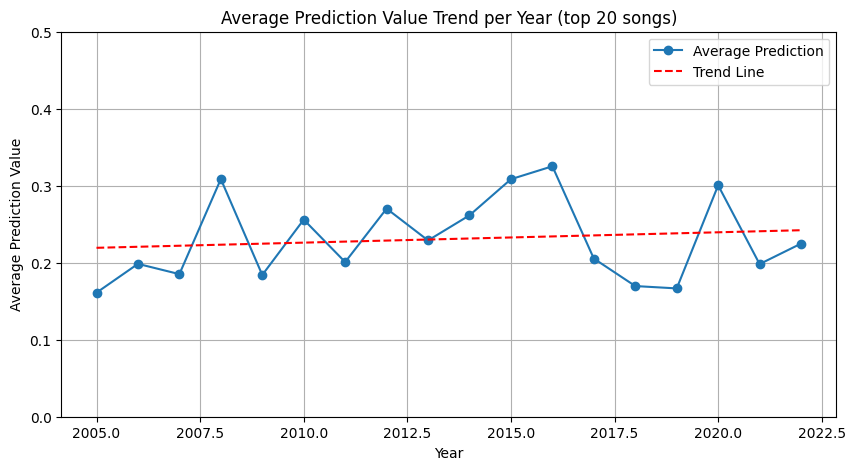

In [44]:
import matplotlib.pyplot as plt

# Sort the DataFrame first by 'year' and then by 'views' in descending order
df_sorted = filtered_dataset.sort_values(by=['year', 'views'], ascending=[True, False])

# Group by 'year' and take the first 100 rows for each year
df_top20_per_year = df_sorted.groupby('year').head(20)

# Group by year and check the distribution of sentiment_pred
sentiment_trend = df_top20_per_year.groupby(['year', 'sentiment_pred']).size().unstack(fill_value=0)

# Create a stacked bar chart
sentiment_trend.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Trend of Sad and Happy Songs Year by Year (top 20 songs)')
plt.xlabel('Year')
plt.legend(title='sentiment_pred', labels=['Positive', 'Passive-negative'])
plt.show()

# Calculate the average 'prediction' value for each 'year'
average_prediction_per_year = df_top20_per_year.groupby('year')['prediction'].mean()

# Get the x and y values for the trend line
x = average_prediction_per_year.index.values
y = average_prediction_per_year.values
z = np.polyfit(x, y, 1)  # Fit a linear regression
p = np.poly1d(z)  # Create a polynomial from the coefficients

# Plot the results
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='Average Prediction', marker='o')
plt.plot(x, p(x), "r--", label='Trend Line')  # Red dashed trend line
plt.title('Average Prediction Value Trend per Year (top 20 songs)')
plt.xlabel('Year')
plt.ylabel('Average Prediction Value')
plt.grid(True)
plt.ylim(0, 0.5)  # Set the limits of the y-axis as per your request
plt.legend()
plt.show()

# Verifying correlation between popularity and model predictions

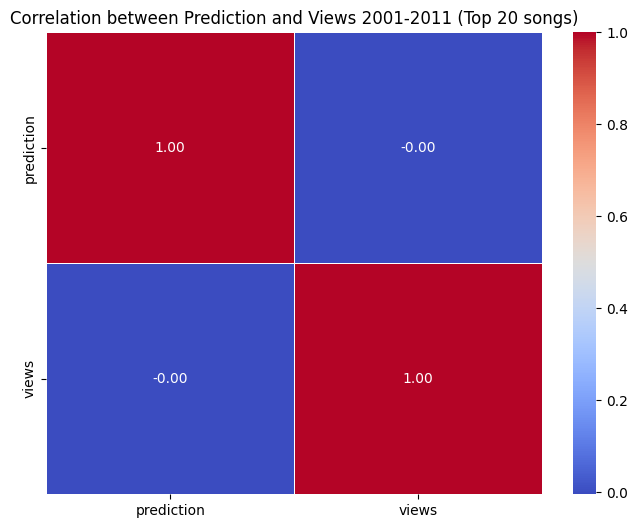

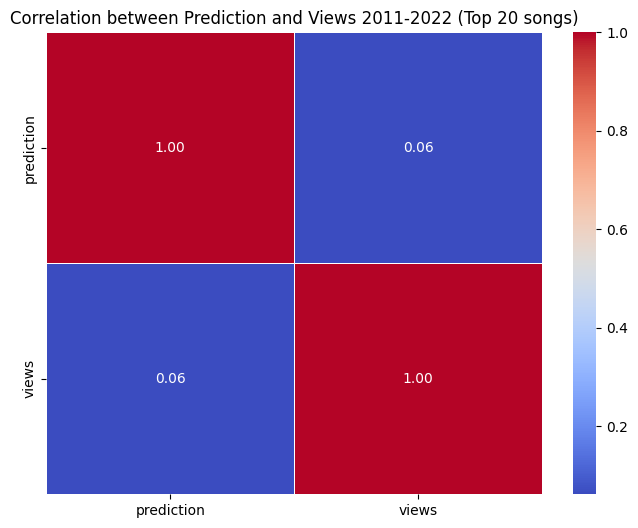

In [66]:
# Display the correlation between the 'prediction' column and the 'views' column
dataset_20_period1 = df_top20_per_year[(df_top20_per_year['year'] >= 2001) & (df_top20_per_year['year'] <= 2011)]
correlation_1 = dataset_20_period1[['prediction', 'views']].corr()

# Create a heatmap to visualize the correlation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Prediction and Views 2001-2011 (Top 20 songs)')
plt.show()

# Display the correlation between the 'prediction' column and the 'views' column
dataset_20_period2 = df_top20_per_year[(df_top20_per_year['year'] >= 2012) & (df_top20_per_year['year'] <= 2022)]
correlation_2 = dataset_20_period2[['prediction', 'views']].corr()

# Create a heatmap to visualize the correlation
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_2, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between Prediction and Views 2011-2022 (Top 20 songs)')
plt.show()



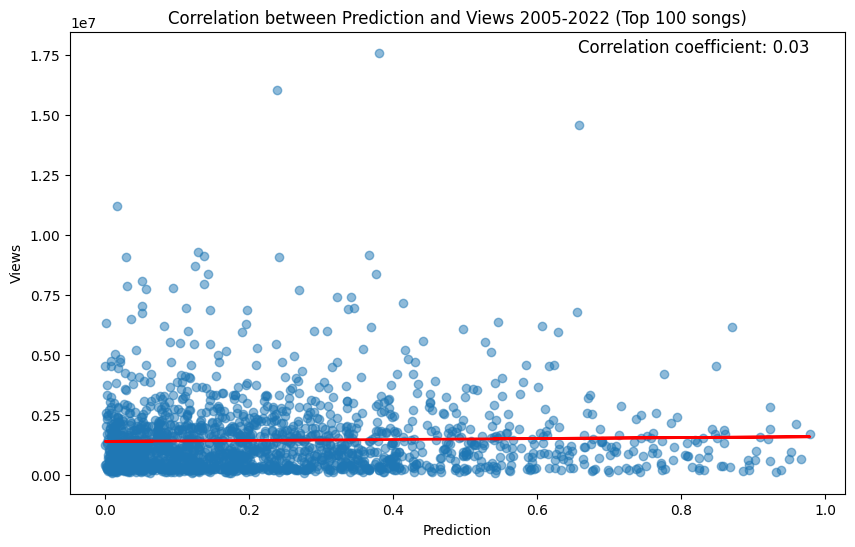

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Filter the dataset for the years 2005 to 2022
filtered_dataset_100 = df_top100_per_year[(df_top100_per_year['year'] >= 2005) & (df_top100_per_year['year'] <= 2022)]

# Get the 'prediction' and 'views' columns
x = filtered_dataset_100['prediction']
y = filtered_dataset_100['views']

# Calculate the line of best fit
m, b = np.polyfit(x, y, 1)

# Calculate the correlation coefficient
correlation_matrix = np.corrcoef(x, y)
correlation_coefficient = correlation_matrix[0, 1]

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

# Add the line of best fit
plt.plot(x, m*x + b, color='red', linewidth=2)

# Add titles and labels
plt.title('Correlation between Prediction and Views 2005-2022 (Top 100 songs)')
plt.xlabel('Prediction')
plt.ylabel('Views')

# Display the correlation coefficient on the plot
plt.text(max(x), max(y), f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=12, ha='right')

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dataset' is your DataFrame and it's already defined
x = dataset['prediction']
y = dataset['views']

# Calculate the line of best fit
m, b = np.polyfit(x, y, 1)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)

# Add the line of best fit
plt.plot(x, m*x + b, color='red', linewidth=2)

# Add titles and labels
plt.title('Correlation between Prediction and Views')
plt.xlabel('Prediction')
plt.ylabel('Views')

# Show the plot
plt.show()
